In [1]:
import config as c
import plots as pl
import numpy as np
import matplotlib.pyplot as plt
from simulation import solve_simulation
from opt_initial_values import inital_values
from opt_diags_gen import diags_gen_backwards_euler

In [2]:
Us = []
n_sim = 10+1
center = -44 * c.milli
sides = 40 * c.milli
v_values = np.linspace(center - sides, center + sides ,n_sim)

print("v_values",v_values)

for v_appl in v_values:
    inital_distr = inital_values(v_appl)
    Us.append(solve_simulation(inital_distr,diags_gen_backwards_euler))

v_values [-0.084 -0.076 -0.068 -0.06  -0.052 -0.044 -0.036 -0.028 -0.02  -0.012
 -0.004]


301
301


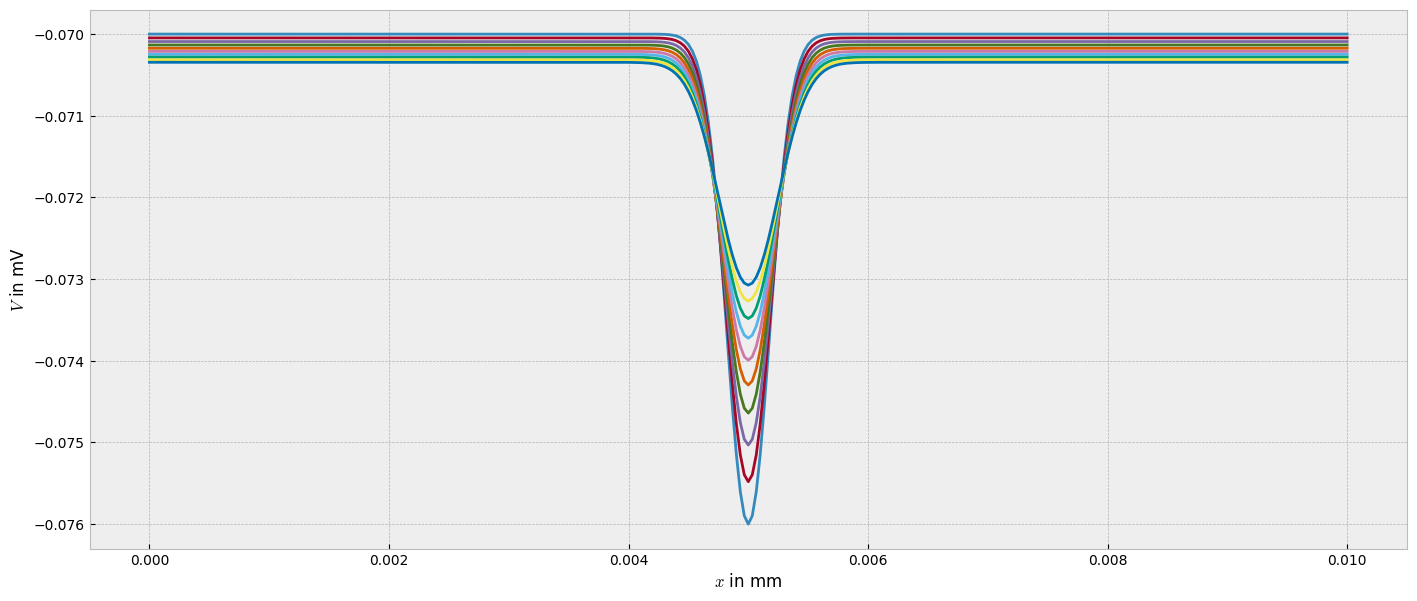

In [7]:
# plot different times
i_v_appl = 1
U = Us[i_v_appl]
      
ts = np.arange(10)*10
ts = [50,100,500,900,-1]

plt.figure(figsize=(17,7))
for t in ts:
    plt.plot(c.x_g,U[t])

plt.title(f"")
plt.ylabel("$V$ in mV")
plt.xlabel("$x$ in mm")
plt.show()

0.00199


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


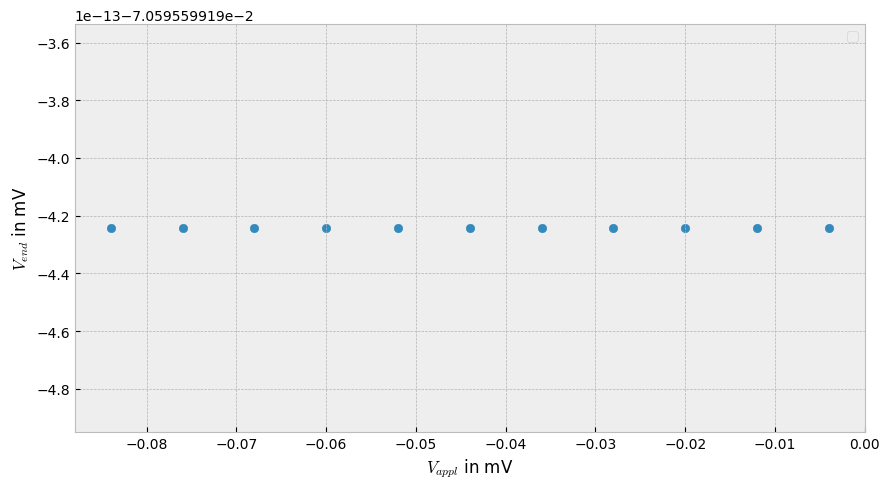

In [4]:
# plot endvoltage against v_appl
# volatage in the middle at the end
endvoltages = []
i_t = c.n_t-1
print(i_t*c.delta_t)
for U in Us:

    endvoltages += [U[i_t,int(c.x_0)]]

plt.style.use('bmh')
plt.figure(figsize=(9,5))
plt.scatter(v_values,np.array(endvoltages))
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
#plt.axvline(c.v_mem,label="$V_{mem}$",alpha=0.5)
plt.tight_layout()
plt.legend()
plt.show()

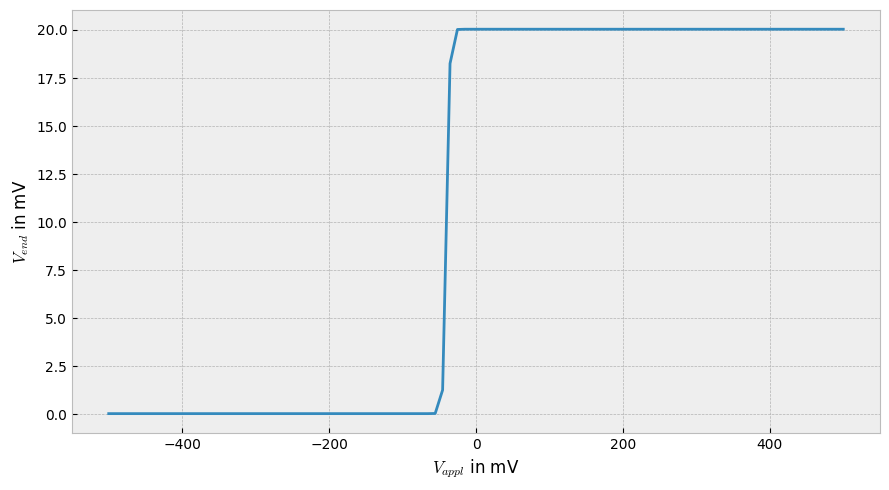

In [5]:
def g_na_g_k(v_vec):
    return ((100/(1 + np.exp(c.gamma*(c.v_star - v_vec)))) + 1/5)/c.g_k

x = np.linspace(-c.v_appl*10,c.v_appl*10,100)
#x = np.linspace(-1e3,1e4,1000)

plt.style.use('bmh')
plt.figure(figsize=(9,5))
plt.plot(x*10**3,g_na_g_k(x))
plt.ylabel("$V_{end}$ in mV")
plt.xlabel("$V_{appl}$ in mV")
plt.tight_layout()
plt.show()
